In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 关闭警告
import warnings
warnings.filterwarnings("ignore")

In [30]:
from utils_type import load_h5ad

In [3]:
# 打印scanpy的版本
import scanpy as sc
print(sc.__version__)

1.9.8


In [31]:
gene_expression,sc_meta, cell_Specimen_ID = load_h5ad(input_bulk_path=r"C:\Users\23639\Desktop\VAE_deconvolution\Raw_data\demo_bulk_15.csv",
                           input_sc_h5ad_path=r'C:\Users\23639\Desktop\VAE_deconvolution\Raw_data\output.h5ad',
                           input_st_data_path=r'C:\Users\23639\Desktop\VAE_deconvolution\Raw_data\st_data.csv',
                           input_st_meta_path=r'C:\Users\23639\Desktop\VAE_deconvolution\Raw_data\st_meta.csv')


读取 h5ad 文件...
提取细胞信息...
提取原始表达矩阵 (UMI counts)...
表达值分布：
最小值：0.0
最大值：3646.0
进行 TPM 标准化...
检查标准化后的数据...
表达矩阵 NaN 统计信息:
- 总元素个数: 1725950000
- NaN 值的总个数: 0
- 至少有一个 NaN 的基因数: 0
- 至少有一个 NaN 的细胞数: 0
- NaN 占比: 0.000000
处理完成！

数据信息概览:
细胞数量: 50000
基因数量: 29561
obs 中的列: ['HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'development_stage_ontology_term_id', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'Tumor_Type']
var 中的列: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']
uns 中的键: []
obsm 中的键: ['X_pca', 'X_umap']
表达矩阵 NaN 统计信息:
- 总

In [32]:
gene_expression = gene_expression.T
gene_expression

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283696,ENSG00000283697,ENSG00000288784,ENSG00000288825,ENSG00000288859,ENSG00000288867,ENSG00000289549,ENSG00000289604,ENSG00000290292,ENSG00000291237
TGAAGCGTAGGTGAGGTCT-3-5607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCTTTGGCACGAAACG-84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGGGAACGAACCACGCT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ATGCTCCGTCTGAGTGC-92,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCAAGGGAGCGCGAT-4-5779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAGATCTCGGGGTCTGAC-41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TGAAAACAGGGAATGTTTG-16-5898,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
GCTTACCTTGATGCCC-3-5779,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGACACCAGTCAAAGA-33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
# 读取txt文件
with open(r"C:\Users\23639\Desktop\Computerdesign\redeconv-master\redeconv-master\cell_names.txt", 'r', encoding='utf-8') as file:
    cell_names = [line.strip() for line in file]

# 打印所有的细胞名
print(cell_names)

['TGCAAGGGAGCGCGAT-4-5779', 'GAGAATACGCAAGTAATC-18', 'AGGTTAGTGAACTTAGC-5-5779', 'TGAAAATGTCGACCCACGA-2', 'GAGAGAGTATACGCAGAG-18', 'TGACAGACCATATCCCACG-46', 'AAAACCTCCTCTAGCAG-30', 'TGCCTCACACATCTAT-35', 'CTTACGGGCTTCAGGT-5', 'TGATTCGCTGGATTGGGCC-18-5607', 'GAGATCTCGGGAGTTCAC-0-5607', 'TGACTCGATGCCGTGGATA-5-5779', 'GACGCTAGTCAGCACCAC-46', 'ACTGAGTGCAGGATTCA-18', 'GATTGGCGTTGATGTGAG-0-5607', 'TGCGTATCCGAGATGT-18-5607', 'GACTCTTGACCGAGATGT-18-5607', 'GCTTTGGCACCTTGCC-15', 'TGACTAGTAACGAATACGC-2-5898', 'CCCATCTGTTCCGAGT-4-5779', 'CGTATTTCTTGTCGCC-5-5779', 'TAGTCTAGTCCCTGAT-18', 'TGACCATTACTCTAGATTG-18-5607', 'ACCCTTGGTCTACCGTT-35', 'GACGATTGATATACTCTT-7-5779', 'AAAACTCGAGTCCAAAG-2', 'GATAAGACGGCGACTCCT-4', 'TGATGATAACAGTTACCGC-13-5779', 'AATCCCACGGAGCGGTA-5', 'TTATAGCCAGTTTAGA-10-5779', 'AAATCAGATACGTGCT-46', 'ATATGCATTTAGTCCG-4', 'GACTTACTCCTCCTTATT-5', 'AGGGAACGACATCGCAG-16-5607', 'TGATATTGCCTCACAACAG-18-5607', 'GACTCTTGACCATTTGTT-91', 'TGAAACACACGACCTTGCC-2-5898', 'AGAAGTCCGACAGATA-10-

In [7]:
# 查看该细胞名对应的样本
cell_Specimen_ID2 = sc_meta[sc_meta['Cell'].isin(cell_names)]
cell_Specimen_ID2

,Cell,Cell_type
TGCAAGGGAGCGCGAT-4-5779,TGCAAGGGAGCGCGAT-4-5779,STM
GAGAATACGCAAGTAATC-18,GAGAATACGCAAGTAATC-18,ABS
AGGTTAGTGAACTTAGC-5-5779,AGGTTAGTGAACTTAGC-5-5779,STM
TGAAAATGTCGACCCACGA-2,TGAAAATGTCGACCCACGA-2,ABS
GAGAGAGTATACGCAGAG-18,GAGAGAGTATACGCAGAG-18,GOB
...,...,...
TGAGCCACATCGAGGCTGA-4-5779,TGAGCCACATCGAGGCTGA-4-5779,SSC
AGATGTATTCGCTAATA-7-5779,AGATGTATTCGCTAATA-7-5779,EE
CTTCAGGTGGCCCTTA-18,CTTCAGGTGGCCCTTA-18,ABS
GGAAACAGCCTGACAC-16-5607,GGAAACAGCCTGACAC-16-5607,ABS


In [8]:
# 自然连接两个dataframe
sc_meta = pd.merge(sc_meta, cell_Specimen_ID, on='Cell')
# 将Cell列变成索引,且保留原来的列
sc_meta = sc_meta.set_index('Cell', inplace=None)
# 将原来的索引变成列
sc_meta = sc_meta.reset_index()

In [10]:
# 将原来的索引变成列
sc_meta = sc_meta.reset_index()
sc_meta

,index,Cell,Cell_type,Specimen_ID
0,0,TGAAGCGTAGGTGAGGTCT-3-5607,ABS,HTA11_7862_2000002021
1,1,GCTTTGGCACGAAACG-84,ABS,HTA11_5216_2000001011
2,2,AGGGAACGAACCACGCT-3,ABS,HTA11_2487_2000001011
3,3,ATGCTCCGTCTGAGTGC-92,ABS,HTA11_411_2000002021
4,4,TGCAAGGGAGCGCGAT-4-5779,STM,HTA11_8622_2000001021
...,...,...,...,...
49995,49995,GAGATCTCGGGGTCTGAC-41,ABS,HTA11_3361_2000001011
49996,49996,TGAAAACAGGGAATGTTTG-16-5898,ASC,HTA11_6818_2000001021
49997,49997,GCTTACCTTGATGCCC-3-5779,GOB,HTA11_7663_2000002011
49998,49998,AAGACACCAGTCAAAGA-33,TAC,HTA11_3361_2000001011


In [11]:
len(sc_meta["Specimen_ID"])
#len(set(cell_Specimen_ID2["Specimen_ID"]))

50000

Counter({'HTA11_2487_2000001011': 2024, 'HTA11_3361_2000001011': 1368, 'HTA11_696_2000001011': 1347, 'HTA11_866_2000001011': 1059, 'HTA11_7663_2000001011': 1002, 'HTA11_411_2000002021': 956, 'HTA11_696_2000002011': 927, 'HTA11_1938_2000001011': 895, 'HTA11_7469_2000002011': 836, 'HTA11_7663_2000002021': 823, 'HTA11_3410_2000002021': 820, 'HTA11_696_2000002021': 798, 'HTA11_347_2000001011': 788, 'HTA11_78_2000001011': 718, 'HTA11_3410_2000001011': 696, 'HTA11_8504_2000002021': 686, 'HTA11_7469_2000002021': 680, 'HTA11_8622_2000002021': 644, 'HTA11_83_2000001011': 617, 'HTA11_8622_2000001021': 609, 'HTA11_7956_2000001011': 584, 'HTA11_6818_2000001021': 584, 'HTA11_7862_2000002011': 559, 'HTA11_7469_2000001011': 555, 'HTA11_6818_2000002011': 540, 'HTA11_3918_2000002021': 531, 'HTA11_6298_2000002011': 528, 'HTA11_8622_2000002011': 527, 'HTA11_4255_2000001011': 519, 'HTA11_411_2000001011': 515, 'HTA11_5994_2000001011': 506, 'HTA11_7696_3000711011': 500, 'HTA11_7663_2000002011': 500, 'HTA11_

Text(0, 0.5, 'Number of Samples')

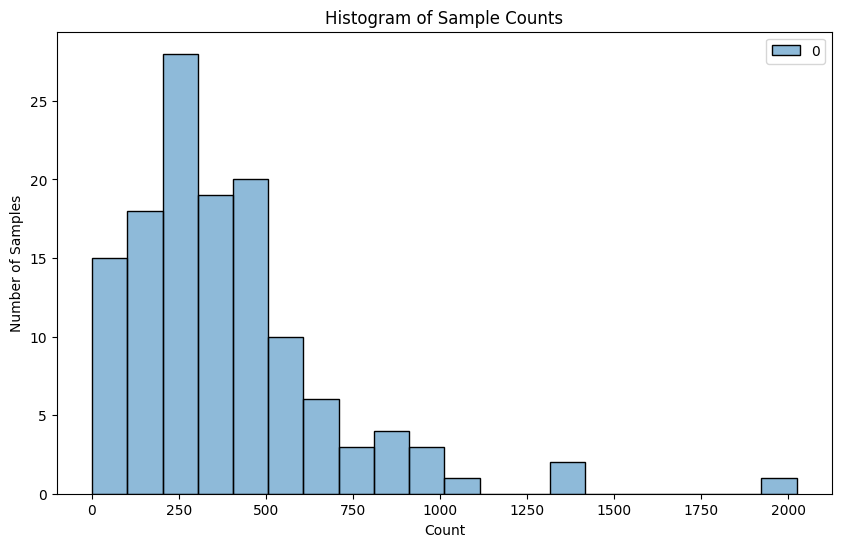

In [12]:
from collections import Counter
cell_Specimen_ID = sc_meta['Specimen_ID']

# 使用Counter来统计每个元素出现的次数
count = Counter(cell_Specimen_ID)

# 输出结果
print(count)
# Counter({'apple': 3, 'banana': 2, 'orange': 1})

# 如果你想要获取某个特定元素的出现次数
# 绘图
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 所有样本的出现次数直方图
plt.figure(figsize=(10, 6))
sns.histplot(data=count.values(), bins=20, kde=False)
plt.title('Histogram of Sample Counts')
plt.xlabel('Count')
plt.ylabel('Number of Samples')
# plt.savefig('sample_counts_histogram.png')

In [13]:
cell_Specimen_ID

0        HTA11_7862_2000002021
1        HTA11_5216_2000001011
2        HTA11_2487_2000001011
3         HTA11_411_2000002021
4        HTA11_8622_2000001021
                 ...          
49995    HTA11_3361_2000001011
49996    HTA11_6818_2000001021
49997    HTA11_7663_2000002011
49998    HTA11_3361_2000001011
49999     HTA11_411_2000001011
Name: Specimen_ID, Length: 50000, dtype: category
Categories (130, object): ['HTA11_78_2000001011', 'HTA11_78_2000002011', 'HTA11_83_2000001011', 'HTA11_83_2000002011', ..., 'HTA11_99999971662_82457', 'HTA11_99999973458_83798', 'HTA11_99999973899_84307', 'HTA11_99999974143_84620']

In [14]:
# 设置索引为Cell
sc_meta = sc_meta.set_index('Cell', inplace=False)
sc_meta

,index,Cell_type,Specimen_ID
Cell,,,
TGAAGCGTAGGTGAGGTCT-3-5607,0,ABS,HTA11_7862_2000002021
GCTTTGGCACGAAACG-84,1,ABS,HTA11_5216_2000001011
AGGGAACGAACCACGCT-3,2,ABS,HTA11_2487_2000001011
ATGCTCCGTCTGAGTGC-92,3,ABS,HTA11_411_2000002021
TGCAAGGGAGCGCGAT-4-5779,4,STM,HTA11_8622_2000001021
...,...,...,...
GAGATCTCGGGGTCTGAC-41,49995,ABS,HTA11_3361_2000001011
TGAAAACAGGGAATGTTTG-16-5898,49996,ASC,HTA11_6818_2000001021
GCTTACCTTGATGCCC-3-5779,49997,GOB,HTA11_7663_2000002011


In [15]:
cell_type = sc_meta['Cell_type'].tolist()
Specimen_ID = sc_meta['Specimen_ID'].tolist()
cell_type = list(set(cell_type))
Specimen_ID = list(set(Specimen_ID))
cell_type

['GOB',
 'TAC',
 'SSC',
 'ASC',
 'TUF',
 'EE',
 'END',
 'PLA',
 'MAS',
 'B',
 'CT',
 'T',
 'FIB',
 'MYE',
 'ABS',
 'STM']

In [32]:
# 寻找所有细胞类型都有的样本
# 初始化一个空列表来存储所有细胞类型都有的样本
common_samples = []
for cell in cell_type:
    # 找到有该细胞类型的样本
    sample_ids = sc_meta[sc_meta['Cell_type'] == cell]['Specimen_ID'].unique()
    # 如果这是第一个细胞类型，直接将样本ID赋值给common_samples
    if not common_samples:
        common_samples = sample_ids
    else:
        # 否则，取交集
        common_samples = set(common_samples)  # 转换为集合
        sample_ids = set(sample_ids)  # 转换为集合
        common_samples = common_samples.intersection(sample_ids)
    # 打印结果
    print(common_samples)



['HTA11_99999965062_69753', 'HTA11_2951_2000001011', 'HTA11_7663_2000002011', 'HTA11_78_2000001011', 'HTA11_4255_2000001011', ..., 'HTA11_99999965062_69756', 'HTA11_546_2000002021', 'HTA11_6182_2000001011', 'HTA11_5216_2000002011', 'HTA11_78_2000002011']
Length: 83
Categories (130, object): ['HTA11_78_2000001011', 'HTA11_78_2000002011', 'HTA11_83_2000001011', 'HTA11_83_2000002011', ..., 'HTA11_99999971662_82457', 'HTA11_99999973458_83798', 'HTA11_99999973899_84307', 'HTA11_99999974143_84620']
{'HTA11_2951_2000001011', 'HTA11_696_2000002011', 'HTA11_104_2000002011', 'HTA11_546_2000002011', 'HTA11_696_2000001011', 'HTA11_347_2000001011', 'HTA11_83_2000002021', 'HTA11_6182_2000001011', 'HTA11_7029_2000002011', 'HTA11_866_3004761011', 'HTA11_7663_2000002011', 'HTA11_6147_2000002011', 'HTA11_6025_2000002011', 'HTA11_411_2000002011', 'HTA11_8622_2000001021', 'HTA11_7469_2000001011', 'HTA11_2235_2000002021', 'HTA11_6310_2000002011', 'HTA11_10167_2000001011', 'HTA11_866_2000001011', 'HTA11_336

In [16]:
sc_meta

,index,Cell_type,Specimen_ID
Cell,,,
TGAAGCGTAGGTGAGGTCT-3-5607,0,ABS,HTA11_7862_2000002021
GCTTTGGCACGAAACG-84,1,ABS,HTA11_5216_2000001011
AGGGAACGAACCACGCT-3,2,ABS,HTA11_2487_2000001011
ATGCTCCGTCTGAGTGC-92,3,ABS,HTA11_411_2000002021
TGCAAGGGAGCGCGAT-4-5779,4,STM,HTA11_8622_2000001021
...,...,...,...
GAGATCTCGGGGTCTGAC-41,49995,ABS,HTA11_3361_2000001011
TGAAAACAGGGAATGTTTG-16-5898,49996,ASC,HTA11_6818_2000001021
GCTTACCTTGATGCCC-3-5779,49997,GOB,HTA11_7663_2000002011


In [17]:
gene_expression

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283696,ENSG00000283697,ENSG00000288784,ENSG00000288825,ENSG00000288859,ENSG00000288867,ENSG00000289549,ENSG00000289604,ENSG00000290292,ENSG00000291237
TGAAGCGTAGGTGAGGTCT-3-5607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCTTTGGCACGAAACG-84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGGGAACGAACCACGCT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ATGCTCCGTCTGAGTGC-92,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCAAGGGAGCGCGAT-4-5779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAGATCTCGGGGTCTGAC-41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TGAAAACAGGGAATGTTTG-16-5898,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
GCTTACCTTGATGCCC-3-5779,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGACACCAGTCAAAGA-33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [18]:
cell_type = ['ABS', 'STM', 'TAC', 'SSC', 'GOB', 'EE', 'B', 'ASC', 'CT', 'MYE','MAS', 'TUF', 'FIB', 'T', 'PLA', 'END']

### 通过箱子对比得到

ABS
['ACAACGTGGTAGTCTAG-38', 'TGAATGAAGCACGTATTTC-38', 'AAAAGTCGGGCGTTGCT-38', 'AATGTTTGGTCCGTAC-38', 'GATCGGTTTACTCGCGTA-38', 'TGATCACCGAGGGCCTAAG-38', 'ATTGGATCGGATTAGAC-38', 'ACAACGTGGGTGTAACC-38', 'GACGTACCTAATCAGCGC-38', 'AGTGTCGGAAAGGTAAT-38', 'AAAACTCGACCACATTA-38', 'AGGGAACGAGCAGCATG-38', 'TGATCGACGGTGTAACGTT-38', 'ACACTCCTCAAGTAATC-38', 'TGACTCGATGCAATGTTTG-38', 'AAAAGTCGGCTGCGTTG-38', 'GCTTTGGCCTCGATGC-38', 'TTAAGCGTGGAAACAG-38', 'GACGCTAGTCGAACGATT-38', 'GATCGGTTTAGTGGATGG-38', 'TGACAAGTCATCAGTTTGC-38', 'GCAGTCGAGATTTACC-38', 'GATCGGTTTATAGCCTCG-38', 'GTAACGTTGCTCTAGT-38', 'AGAGGTGGAGACACCA-38', 'TGACTACCGTTCCCTTGGT-38', 'TGAGGAATAGATCCTTATT-38', 'TGATAACCCGTAATGTTTG-59', 'GAGGGAGGTAGTTGTCAT-38', 'ACGTATACCATCGCAG-38', 'ACCTTCTTGAAGGCTT-38', 'AAAGGTAATAACTTAGC-38', 'GATTGGCGTTTCGGTACG-38', 'GACAAGAGGGAACACACG-38', 'TGGTATGACTTGGTGT-38', 'TGAGCAAGGACAGATGGCT-38', 'AATTCAGTAAAGCTTCT-38', 'TGATTGTCGCCAAACGCCT-38', 'TGCGACAGTAGTCTAG-38', 'AGAACGATTGGAATAGA-38', 'TGACTTCTGGACCATT

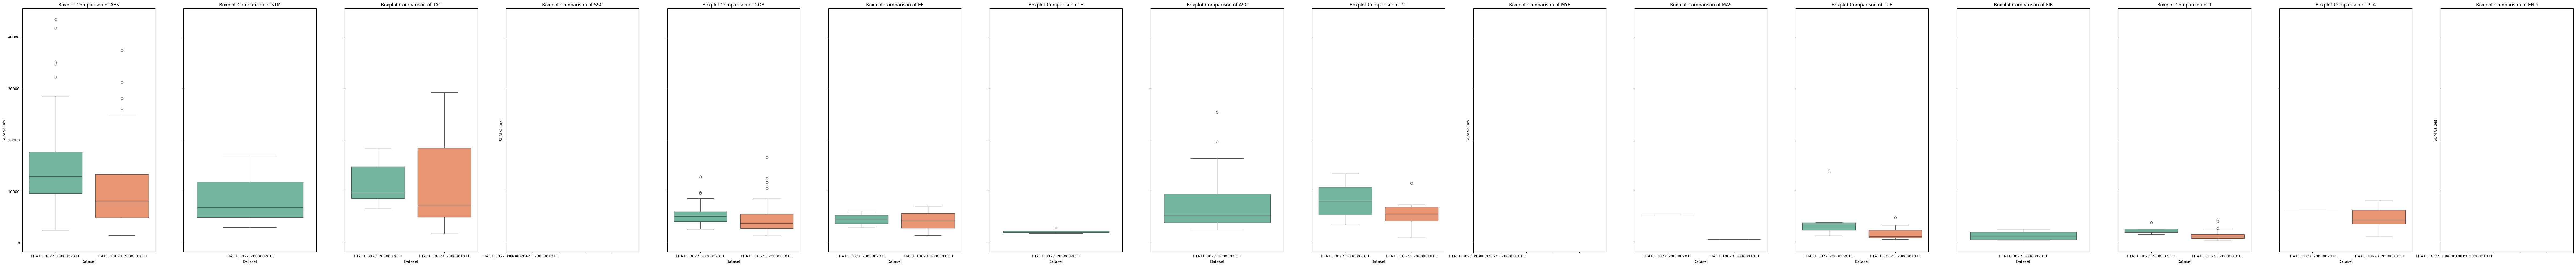

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设 cell_type 是一个包含细胞类型的列表
# 假设 sc_meta 是一个包含样本元数据的 DataFrame
# 假设 gene_expression 是一个包含基因表达数据的 DataFrame

# 设置画布大小
fig, axes = plt.subplots(nrows=1, ncols=len(cell_type), figsize=( 6 * len(cell_type),10), sharey=True)
# target_id = sc_meta[sc_meta['Cell_type'] == 'ABS']["Specimen_ID"].value_counts().idxmax()
# 遍历每个细胞类型
# 选出样本ID为HTA11_6818_2000001021的细胞
id1='HTA11_3077_2000002011'
id2='HTA11_10623_2000001011'
for i, cell in enumerate(cell_type):
    print(cell)
    # 找到对应的索引
    index = sc_meta[(sc_meta['Cell_type'] == cell) & (sc_meta['Specimen_ID'] == id1)].index.tolist()
    # 获取该细胞类型中数量最多的样本
    target_id = sc_meta[sc_meta['Cell_type'] == cell]["Specimen_ID"].value_counts().idxmax()
    # 找到对应的索引
    # 找到对应的索引，满足细胞类型等于cell且样本ID等于target_id
    index2 = sc_meta[(sc_meta['Cell_type'] == cell) & (sc_meta['Specimen_ID'] == id2)].index.tolist()
    # 取出其中来自同一个样本的细胞
    # 取出对应的行
    print(index)
    data_tot = gene_expression.loc[index, :]
    data_one = gene_expression.loc[index2, :]
    # 计算每行的和
    data_tot["SUM"] = data_tot.sum(axis=1)
    data_one["SUM"] = data_one.sum(axis=1)
    print(data_tot)
    
    # 创建一个新的DataFrame来存储两个数据集的 "SUM" 列
    data = pd.DataFrame({
        'SUM': pd.concat([data_tot["SUM"], data_one["SUM"]]),
        'Dataset': [id1] * len(data_tot) + [id2] * len(data_one)
    })
    # print(data)
    # 在子图上绘制箱线图
    sns.boxplot(x='Dataset', y='SUM', data=data, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot Comparison of {cell}')
    axes[i].set_ylabel('SUM Values')
    axes[i].set_xticklabels([id1, id2])

# 调整子图间距
plt.tight_layout()

plt.savefig(r'report\boxplot\boxplot_comparison_SAMPLEvsTOT'+'of '+id1+id2+'.png')

In [28]:
data_one

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283697,ENSG00000288784,ENSG00000288825,ENSG00000288859,ENSG00000288867,ENSG00000289549,ENSG00000289604,ENSG00000290292,ENSG00000291237,SUM


ABS
14157.793
6106.2456
STM
Skipping STM due to insufficient data.
TAC
11641.143
6887.6855
SSC
Skipping SSC due to insufficient data.
GOB
5407.561
4411.5537
EE
4573.0
3012.875
B
2192.75
1684.0
ASC
Skipping ASC due to insufficient data.
CT
8127.25
4076.7727
MYE
Skipping MYE due to insufficient data.
MAS
Skipping MAS due to insufficient data.
TUF
5161.5
1736.0
FIB
Skipping FIB due to insufficient data.
T
2500.5
1305.8462
PLA
6384.0
9921.0
END
Skipping END due to insufficient data.


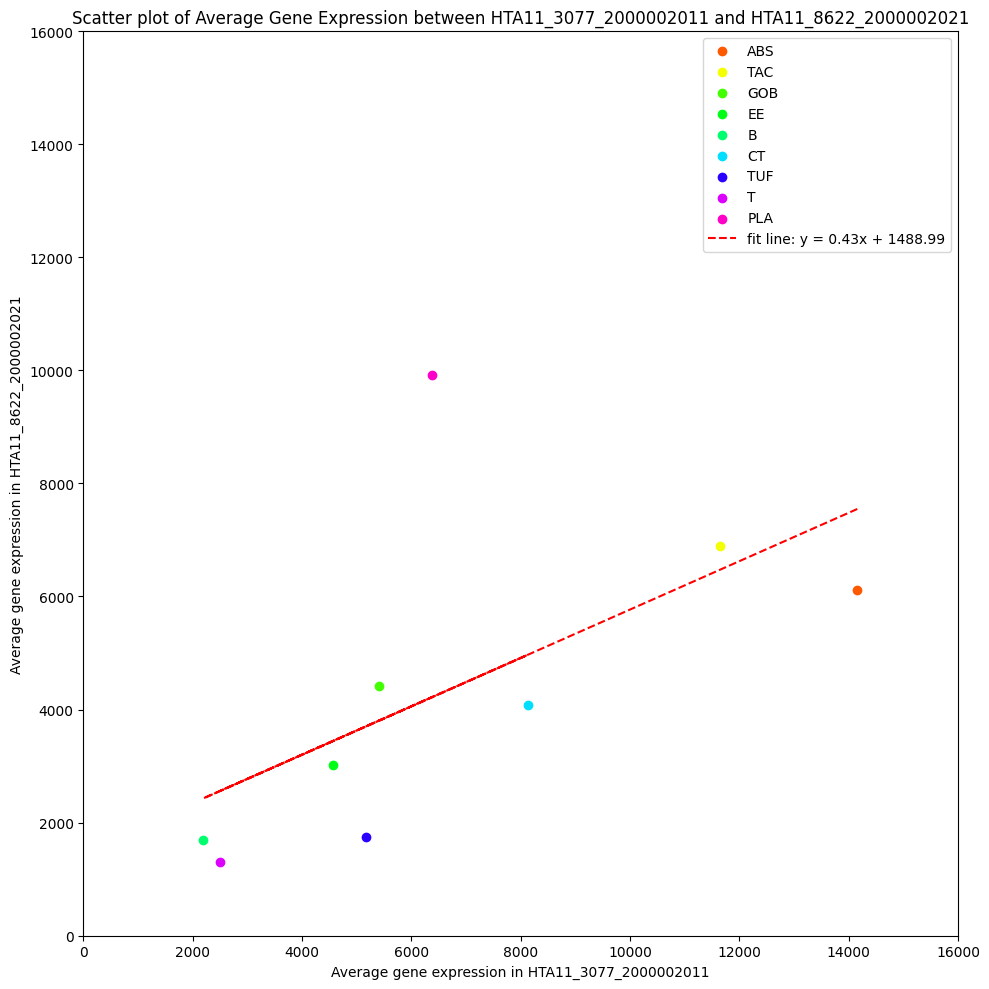

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设 cell_type 是一个包含细胞类型的列表
# 假设 sc_meta 是一个包含样本元数据的 DataFrame
# 假设 gene_expression 是一个包含基因表达数据的 DataFrame

# 设置画布大小
plt.figure(figsize=(10, 10))
id1='HTA11_3077_2000002011'
id2='HTA11_8622_2000002021'
# 定义颜色列表，确保每种细胞类型有不同的颜色
palette = sns.color_palette("hsv", len(cell_type))  # 使用HSV颜色映射，可以根据需要调整
x=[]
y=[]
# 遍历每个细胞类型
for i, cell in enumerate(cell_type):
    print(cell)
    # 找到满足条件的索引
    index1 = sc_meta[(sc_meta['Cell_type'] == cell) & (sc_meta['Specimen_ID'] == id1)].index.tolist()
    index2 = sc_meta[(sc_meta['Cell_type'] == cell) & (sc_meta['Specimen_ID'] == id2)].index.tolist()
    
    if len(index1) == 0 or len(index2) == 0:
        print(f"Skipping {cell} due to insufficient data.")
        continue

    # 取出对应的基因表达数据
    data_tot = gene_expression.loc[index1, :]
    data_one = gene_expression.loc[index2, :]

    # 计算每种细胞的平均基因表达值
    data_tot["SUM"] = data_tot.sum(axis=1)
    data_one["SUM"] = data_one.sum(axis=1)

    cell_mean1 = data_tot['SUM'].mean(axis=0)
    cell_mean2 = data_one['SUM'].mean(axis=0)
    print(cell_mean1)
    print(cell_mean2)
    # 绘制散点图，为每种细胞类型分配不同的颜色
    plt.scatter(cell_mean1, cell_mean2, color=palette[i], label=cell)
    x.append(cell_mean1)
    y.append(cell_mean2)

# 添加标题和标签
plt.title(f'Scatter plot of Average Gene Expression between {id1} and {id2}')
plt.xlabel(f'Average gene expression in {id1}')
plt.ylabel(f'Average gene expression in {id2}')
# 使用NumPy的polyfit函数进行线性拟合
import numpy as np

x = np.array(x)  # 示例X数据
y = np.array(y)  # 示例Y数据
coefficients = np.polyfit(x, y, 1)  # 1表示线性拟合
slope, intercept = coefficients  # 斜率和截距

# 计算拟合直线的Y值
y_fit = slope * x + intercept

# 添加图例
plt.legend(title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot(x, y_fit, color='red', linestyle='--', label=f'fit line: y = {slope:.2f}x + {intercept:.2f}')  # 虚线
plt.xlim(0, 16000)
plt.ylim(0, 16000)
# 显示图表
plt.legend()
plt.tight_layout()
plt.show()